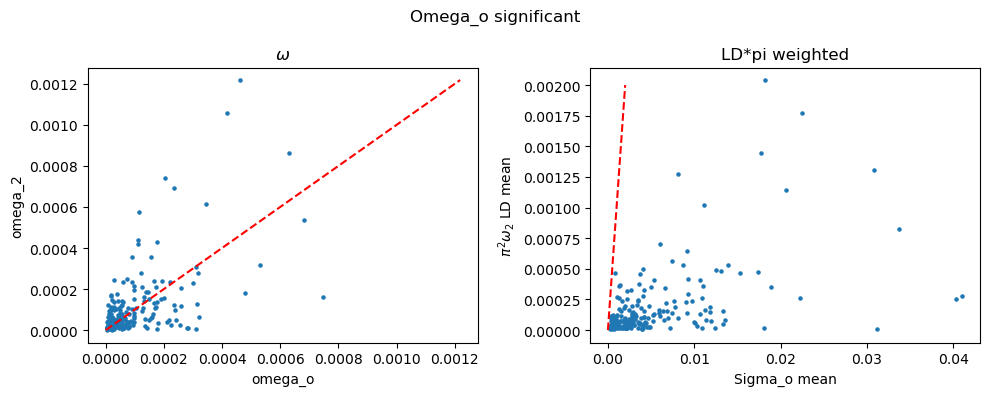

In [35]:
from matplotlib import pyplot as plt
import pandas as pd

file="/home/wjiang49/traceCB/log/test_sigmao_QTD000081_Monocytes.csv"

data = pd.read_csv(file)
df_run = data[data['run_gmm'] == 1]
# Sigma_o_mean,Sigma_o_set_zero,Omega2LD_mean,Omega_o,Omega_2,run_gmm
# 5.70029734e-03,False,1.01827752e-03,7.85158740e-05,1.01920200e-05,0

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
df_sigmao_notzero = df_run[df_run['Sigma_o_set_zero'] == False]
axes[0].scatter(df_sigmao_notzero['Omega_o'], df_sigmao_notzero['Omega_2'],s=5)
axes[0].set_title(rf'$\omega$')
axes[0].set_xlabel('omega_o')
axes[0].set_ylabel('omega_2')
# x=y line
axes[0].plot([0, df_sigmao_notzero['Omega_2'].max()], [0, df_sigmao_notzero['Omega_2'].max()], color='red', linestyle='--')

axes[1].scatter(pd.to_numeric(df_sigmao_notzero['Sigma_o_mean'], errors='coerce'), df_sigmao_notzero['Omega2LD_mean']*(0.15**2),s=5)
axes[1].plot([0, 0.002], [0, 0.002], color='red', linestyle='--')
axes[1].set_title('LD*pi weighted')
axes[1].set_xlabel('Sigma_o mean')
axes[1].set_ylabel(rf'$\pi^2 \omega_2$ LD mean')

plt.suptitle('Omega_o significant')
plt.tight_layout()
plt.show()


In [36]:
(df_sigmao_notzero.Omega_o / df_sigmao_notzero.Omega_2).describe()

count    203.000000
mean       2.373440
std        6.279654
min        0.055705
25%        0.435247
50%        0.979847
75%        2.090432
max       75.874951
dtype: float64

In [37]:
(df_sigmao_notzero.Omega_2 / df_sigmao_notzero.Omega_o).describe()

count    203.000000
mean       1.762455
std        2.173661
min        0.013180
25%        0.478371
50%        1.020568
75%        2.297545
max       17.951779
dtype: float64

In [38]:
(pd.to_numeric(df_sigmao_notzero['Sigma_o_mean'], errors='coerce') / (df_sigmao_notzero['Omega2LD_mean']*0.15**2)).describe()

count     203.000000
mean       76.653125
std       202.809065
min         1.799054
25%        14.056840
50%        31.645341
75%        67.513026
max      2450.473769
dtype: float64

In [39]:
pd.to_numeric(df_sigmao_notzero['Sigma_o_mean'], errors='coerce')

7       0.000417
8       0.001653
18      0.004382
20      0.003594
21      0.000845
          ...   
1291    0.004163
1301    0.005900
1305    0.001569
1313    0.002117
1330    0.017776
Name: Sigma_o_mean, Length: 203, dtype: float64